In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
import scipy.optimize

In [49]:
N = 40; n = np.arange(1,N+1); M = 2*N + 1
L = 2*np.pi

Delta = L/(M+1)
collocation_points = 2*(np.random.random(M)-1/2)*2*L/2 #np.linspace(-L/2, L/2-Delta, M)
print(len(collocation_points))
print(M)
epsilon = 0.1; D = 0.6; alpha = 0.95; 
print(n)
Lambda = 15
A = (1-alpha)*Lambda*40
print(A)
print(collocation_points)

81
81
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40]
30.00000000000003
[ 5.51016615 -3.18538181  2.15674089  0.72652521 -3.23988491  0.02517257
 -4.18573751  3.59088504  4.98682177 -5.37178807 -0.5750451   3.90930595
  3.52833767  0.85967504  5.99923956  5.38502247  1.36711919 -3.72597587
  4.702311    1.27338844 -2.74204728  0.06169765  1.94647951  0.17729211
 -0.93333919  1.16835511 -1.88465691 -4.4912195  -4.13638237 -4.70863333
  0.28928066 -1.58381395  5.63641862  0.67828165 -2.27960291  0.18713778
  1.31200459 -4.19546532  5.28092018  3.98783332 -1.95377071  0.45838394
 -2.46427663  2.87764139  3.41238178  4.56846469 -1.70564307 -3.30355951
 -1.7807693  -4.20372332 -2.16041019 -3.61554586  3.75924058  2.85936419
 -3.24233128  3.93904208  6.08710107 -5.79936091 -1.18856092  4.46614527
 -2.45119199 -0.63345079  0.55603622 -5.63908568 -5.2316529  -3.20908915
 -3.19223087 -0.87437791  3.2852093   5.77255951 -

In [50]:
def f_solitary_wave(vec):
    M = len(vec); N = int((M-1)/2)
    a = np.zeros(N)
    a[0] = 8.36599503e-01
    
    #print(vec)
    a[1:] = vec[:N-1]; b = vec[N-1:(2*N-1)]; c = vec[M-2]; K = vec[-1]

    eta = np.zeros_like(collocation_points); eta_z = np.zeros_like(collocation_points)
    eta_zz = np.zeros_like(collocation_points); eta_zzz = np.zeros_like(collocation_points)
    
    for j,n_value in enumerate(n):
        eta += a[j]*np.cos(2*n_value*np.pi/L*collocation_points) + b[j]*np.sin(2*n_value*np.pi/L*collocation_points) + A
        #eta_z
        eta_z += -a[j]*np.sin(2*n_value*np.pi/L*collocation_points)*2*n_value*np.pi/L
        eta_z += b[j]*np.cos(2*n_value*np.pi/L*collocation_points)*2*n_value*np.pi/L
        #eta_zz
        eta_zz += -a[j]*np.cos(2*n_value*np.pi/L*collocation_points)*(2*n_value*np.pi/L)**2
        eta_zz += -b[j]*np.sin(2*n_value*np.pi/L*collocation_points)*(2*n_value*np.pi/L)**2
        #eta_zzz
        eta_zzz += a[j]*np.sin(2*n_value*np.pi/L*collocation_points)*(2*n_value*np.pi/L)**3
        eta_zzz += -b[j]*np.cos(2*n_value*np.pi/L*collocation_points)*(2*n_value*np.pi/L)**3
    
    #plt.plot(collocation_points, eta)
    equations = np.zeros_like(vec)
    equations = -c/eta**2 + 1/3*(1+D*eta_z+epsilon**2*eta_zzz)-K/eta**3
    #print((equations**2).mean())
    return equations

def f_solitary_wave_no_division(vec):
    M = len(vec); N = int((M-1)/2)
    a = np.zeros(N)
    a[0] = 8.36599503e-01
    
    #print(vec)
    a[1:] = vec[:N-1]; b = vec[N-1:(2*N-1)]; c = vec[M-2]; K = vec[-1]

    eta = np.zeros_like(collocation_points); eta_z = np.zeros_like(collocation_points)
    eta_zz = np.zeros_like(collocation_points); eta_zzz = np.zeros_like(collocation_points)
    
    for j,n_value in enumerate(n):
        eta += a[j]*np.cos(2*n_value*np.pi/L*collocation_points) + b[j]*np.sin(2*n_value*np.pi/L*collocation_points) + A
        #eta_z
        eta_z += -a[j]*np.sin(2*n_value*np.pi/L*collocation_points)*2*n_value*np.pi/L
        eta_z += b[j]*np.cos(2*n_value*np.pi/L*collocation_points)*2*n_value*np.pi/L
        #eta_zz
        eta_zz += -a[j]*np.cos(2*n_value*np.pi/L*collocation_points)*(2*n_value*np.pi/L)**2
        eta_zz += -b[j]*np.sin(2*n_value*np.pi/L*collocation_points)*(2*n_value*np.pi/L)**2
        #eta_zzz
        eta_zzz += a[j]*np.sin(2*n_value*np.pi/L*collocation_points)*(2*n_value*np.pi/L)**3
        eta_zzz += -b[j]*np.cos(2*n_value*np.pi/L*collocation_points)*(2*n_value*np.pi/L)**3
    
    #plt.plot(collocation_points, eta)
    equations = np.zeros_like(vec)
    equations = -c*eta**2 + 1/3*eta**3*(1 + D*eta_z+epsilon**2*eta_zzz)-K
    #print((equations**2).mean())
    return equations

In [51]:
vec_guess = np.concatenate([np.random.random(N-1)*0.01, 0.01*np.random.random(N), np.array([1,0])])


In [52]:
#vec_sol = scipy.optimize.fsolve(f_solitary_wave,  vec_guess, xtol = 1e-4)
sol = scipy.optimize.root(f_solitary_wave_no_division,  vec_guess, method='lm')
vec_sol = sol.x
print(sol.success)

True


In [32]:
sol = scipy.optimize.root(f_solitary_wave,  vec_guess, method='lm')
vec_sol = sol.x
print(sol.success)

True


In [53]:
a_sol = np.concatenate([np.array([8.36599503e-01]), vec_sol[:N-1]]);
b_sol = vec_sol[N-1:(2*N-1)];
print(M)
print(len(vec_sol))
c = vec_sol[M-2];
K = vec_sol[-1]

81
81


30.000000000000025


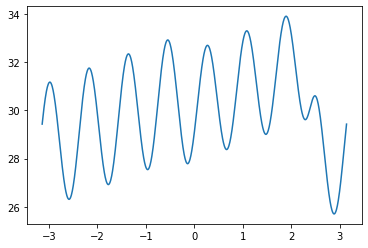

In [54]:
refined_z = np.linspace(-L/2, L/2,1000)
eta_sol = np.zeros_like(refined_z) + A
for j,n_value in enumerate(n):
    eta_sol += a_sol[j]*np.cos(n_value*2*np.pi/L*refined_z) + b_sol[j]*np.sin(n_value*2*np.pi/L*refined_z)
plt.plot(refined_z, eta_sol)
print(np.trapz(eta_sol, refined_z)/L)


In [55]:
print(c)

2762.2731484821093


In [56]:
print(K)

-3142528080.944258


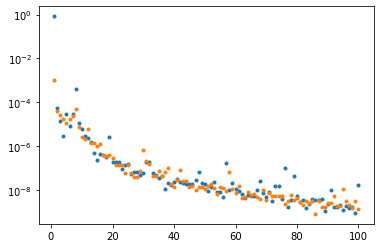

In [11]:
plt.semilogy(n, abs(a_sol), '.')
plt.semilogy(n, abs(b_sol), '.')

In [316]:
a_sol

array([ 8.36599503e-01, -2.71724997e-02,  1.31808115e-03, -7.94236568e-05,
        3.91090383e-05,  5.29465027e-06, -3.88034355e-05, -7.11768072e-05,
        7.70067549e-05, -1.00817368e-06, -4.02738673e-06, -6.41858158e-06,
        1.34719438e-06,  7.90731931e-07, -5.20623071e-07,  2.62559171e-06,
        1.93771911e-07,  3.75021838e-07, -4.54558660e-07, -3.55970266e-07,
        2.02251843e-07, -2.25951647e-07,  1.97214879e-06,  6.11316482e-07,
        4.79313755e-08,  4.74933060e-07, -3.97109956e-07, -9.88007449e-08,
        5.04559220e-08,  5.94536465e-08, -4.84595719e-08, -2.01933738e-07,
        1.15935195e-07, -7.49780426e-08,  1.46323753e-07, -6.22235551e-08,
       -5.06100703e-08, -3.02286613e-08, -2.63896529e-08, -3.48470599e-08])